Overview: For data to be used properly for research purposes or for gaining insights about a certain topic, the collected data has to go through a number of stages before being able to use this data efficiently. First, the collected data has to be "cleaned" by removing any useless or misleading data entries that may have a negative impact on the outcome of the process, then data goes through the analysis process where visual and statistical aids are used to understand what the data actually means and finally conclusions and predictions are based based on the analysis' stage findings. For exploring those stages, "The Android App Market on Google Play" dataset was used, since it is a rich, continously-growing, highly verstaile market where data analysis can reveal numerous trends and patterns.

Initial Questions: When it comes to mobile applications, the number of installs for an application can clearly reflect how successful the application is. Another measure can be the rating of an application, reflecting users' satisfaction with the application. So the main question here would be: how does an application's attributes (such as size, genre, type and other attributes) affect its total installs and its rating. 

Data: Here two datasets were used. The first one "apps.csv" provides the main features of each application such as size, rating and number of installs. The second one "user_reviews.csv" contains reviews for each application and measures that reflect users' satisfaction with the application based on their reviews such as sentiment subjectivity and polarity. Both datasets were acquired through "Kaggle". For the cleaning stage, each of the following procedures was carried out:

1-Data Cleaning: 

In [1]:
##### First Dataset: 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv("E:/Semester9/DE/googleplaystore.csv")

In [2]:
### Dropping duplicates: 
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [3]:
### Checking for null values in each column: 
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
#### Checking "Type" column different values to fill its only null value
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [5]:
### After inspecting the entry where "Type" is equal to 0, which is obviuosly an invalid value, those alterations were made: 
df.loc[df.Type=='0', ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres',
                     'Last Updated', 'Current Ver', 'Android Ver']] = [np.NaN, 1.9, '19', '3.0M', '1,000+', 'Free', '0', 
                                                                      'Everyone', np.NaN, 'February 11, 2018', '1.0.19', '4.0 and up']

In [6]:
df.loc[df.Category.isnull(), ['Category','Genres']] = 'Lifestyle'

In [7]:
### Checking for null values again
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [8]:
#Checking the entry where "Type" column is null 
df.loc[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [9]:
#Since most of the columns values are not availble for this entry, we decide to drop it 
df=df[df.Installs != '0']

In [10]:
### Checking for null values again
df.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
#Dropping entries where all column values are null 
df.dropna(axis=0, how='all', inplace=True)

In [15]:
# Dropping entries where the name of the application is not available
df = df.dropna(axis=0, subset=['App'])

In [12]:
### Checking for null values again
df.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
#To fill null values for "Rating" column, we decided to group the applications which have the same name assuming they would
#have a similar rating and fill the null values with the mean of those applications' ratings
df.Rating = df.groupby('App')['Rating'].apply(lambda x: x.fillna(x.mean()))

In [14]:
### Checking for null values again
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
#Checking the data type of each column 
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
#As we can see, the columns "Reviews", "Size", "Installs" and "Price" should have a numeric data type, which is not the 
#case here 
df.Price = df.Price.str.replace('$','')

In [18]:
df.Price = df.Price.astype('float64')

In [19]:
df.Installs = df.Installs.str.replace('+','')

In [20]:
df.Installs = df.Installs.str.replace(',','')

In [21]:
df.Installs = df.Installs.astype('int64')

In [22]:
df.Reviews = df.Reviews.astype('int64')

In [23]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#Only the "size" column was not converted to a numeric data type because some applications' sizes are in Megabytes and others
#are in Kilobytes, so we had to adjust them manually using Excel 

In [24]:
#Exporting the dataset after making the previuos modifications 
df.to_csv ('E:/Semester9/DE/output1.csv', index = None, header=True)

Here we updated the output dataset by adding 3 new columns, which are "size" which is the numeric value included in the original "Size" column, "multiple" which is the value to be multiplied by the numeric value in order to calculate the size of the application in bytes and finally, "Size_modified" which is the actual size of the application in bytes. For applications whose size varies with the device, we equated the size to 0 for now to be filled with the average size of an application later on. 

In [25]:
#Reimporting the dataset 
df = pd.read_csv("E:/Semester9/DE/output1.csv")

In [26]:
df.dtypes

size               object
multiple            int64
Size_modified       int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#As we can see, the "Size_modified" column is of a numeric data type now
#Dropping the unneeded columns 

In [27]:
df.drop(columns=['size','multiple'], inplace=True)

For the remaining null values in the applications' ratings, we first tried filling them manually using the "Google PlayStore" website and searching for each application's ratings. But since more than a thousand ratings are missing, we could not do so for all the missing values, so we used the average application's rating to fill the remaining missing values. 

In [31]:
df[['Rating']] = df[['Rating']].fillna(df.Rating.mean())

In [32]:
df.loc[df.Size_modified == 0, 'Size_modified'] = df.Size_modified.mean()

In [34]:
#As we can see, the number of nulls for applications' Ratings is now 0. 
df.isnull().sum()

Size_modified     0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [35]:
#Exporting the finalized cleaned data 
df.to_csv ('E:/Semester9/DE/cleaned_data.csv', index = None, header=True)

2-Exploratory Analysis

First we explore how each attribute affects the number of installs for an application.

-Since the application's rating, price, size and number of reviews are expressed as numeric values, we had to divide them into
labels to be able to use those attributes to plot a "bar chart" graph against the number of installs.  
-Other non-numeric attributes such as "Type", "Genre" and "Content Rating" can be used directly. 

In [36]:
#Rating
cut_labels = ['1-2', '2-3', '3-4', '4-5']
cut_bins = [0.9,2,3,4,5]
df['Rating_labels'] = pd.cut(df['Rating'], bins=cut_bins, labels=cut_labels)

<BarContainer object of 4 artists>

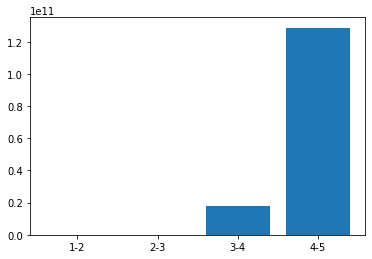

In [40]:
x= df.groupby('Rating_labels')['Installs'].sum()
plt.bar(x.index,x)

In [41]:
#Reviews
cut_labels = ['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000+']
cut_bins = [-1,1000,10000,100000,1000000,80000000]
df['Reviews_labels'] = pd.cut(df['Reviews'], bins=cut_bins, labels=cut_labels)

<BarContainer object of 5 artists>

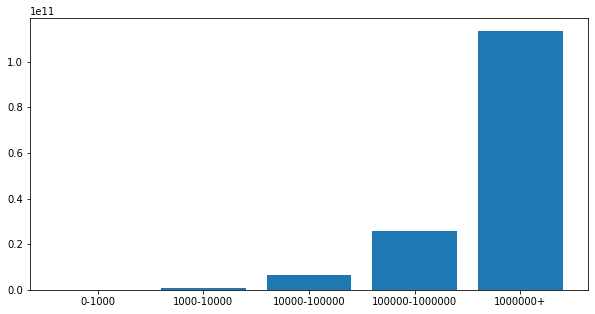

In [42]:
x= df.groupby('Reviews_labels')['Installs'].sum()
plt.subplots(figsize=(10,5))
plt.bar(x.index,x)

In [43]:
#Price
cut_labels = ['0-100', '100-200', '200-300', '300-400']
cut_bins = [-1,100,200,300,400]
df['Price_labels'] = pd.cut(df['Price'], bins=cut_bins, labels=cut_labels)

<BarContainer object of 4 artists>

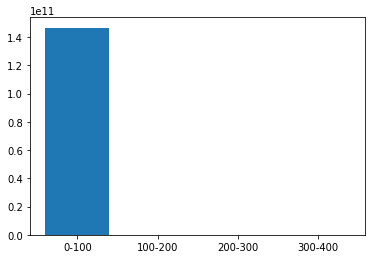

In [44]:
x= df.groupby('Price_labels')['Installs'].sum()
plt.bar(x.index,x)

<BarContainer object of 2 artists>

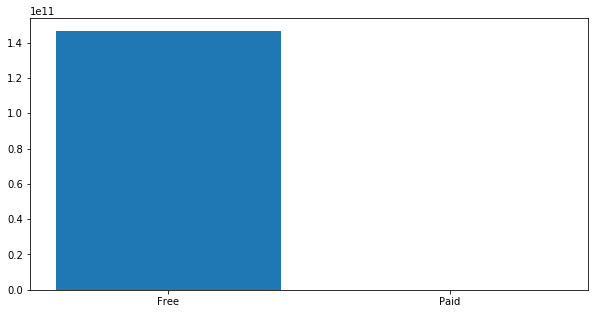

In [45]:
#Type
x= df.groupby('Type')['Installs'].sum()
plt.subplots(figsize=(10,5))
plt.bar(x.index,x)

<BarContainer object of 119 artists>

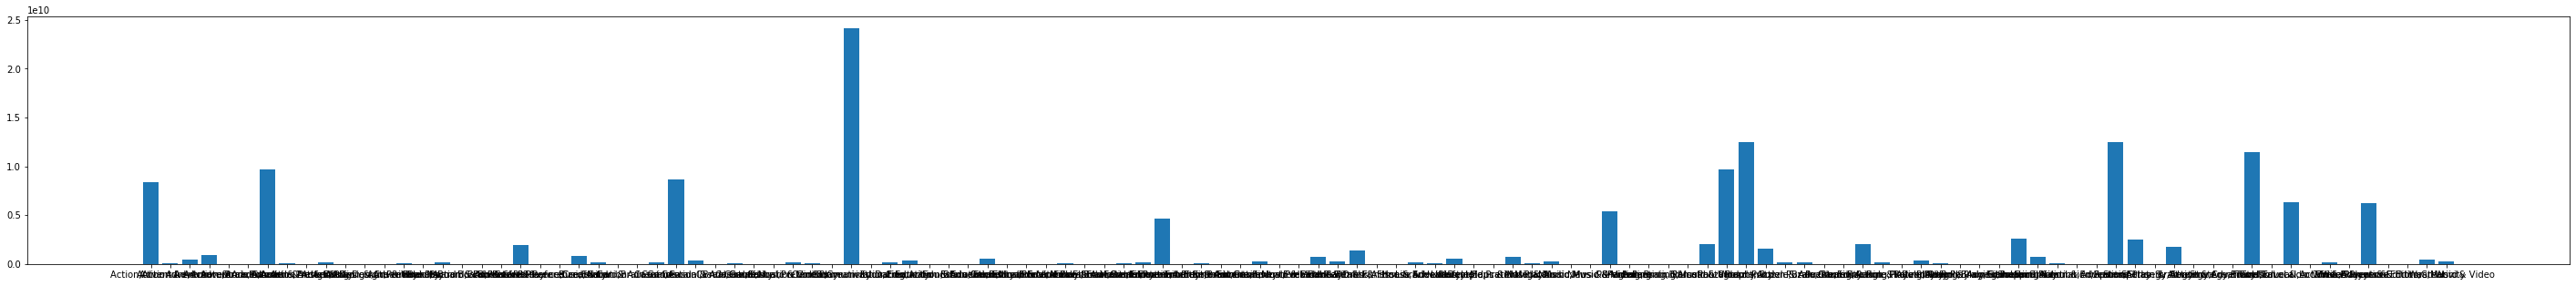

In [46]:
#Genre
x= df.groupby('Genres')['Installs'].sum()
plt.subplots(figsize=(50,5))
plt.bar(x.index,x)

In [48]:
#Since the "Genre" column has many unique values, the bar chart here is not a wise choice for visual representation.
#Instead we use a statistical method, which is the sum of the number of installs for each genre. 
x= df.groupby('Genres')['Installs'].sum()
x.sort_values(ascending=False)

Genres
Communication                          24152276251
Social                                 12513867902
Productivity                           12463091369
Tools                                  11442771915
Photography                             9721247655
Arcade                                  9717129155
Casual                                  8662830740
Action                                  8336039190
Travel & Local                          6361787146
Video Players & Editors                 6207002720
News & Magazines                        5393217760
Entertainment                           4680714684
Shopping                                2573348785
Sports                                  2544574498
Personalization                         2074494782
Racing                                  2000247320
Books & Reference                       1916469576
Strategy                                1774187605
Puzzle                                  1552476811
Health & Fitness        

<BarContainer object of 6 artists>

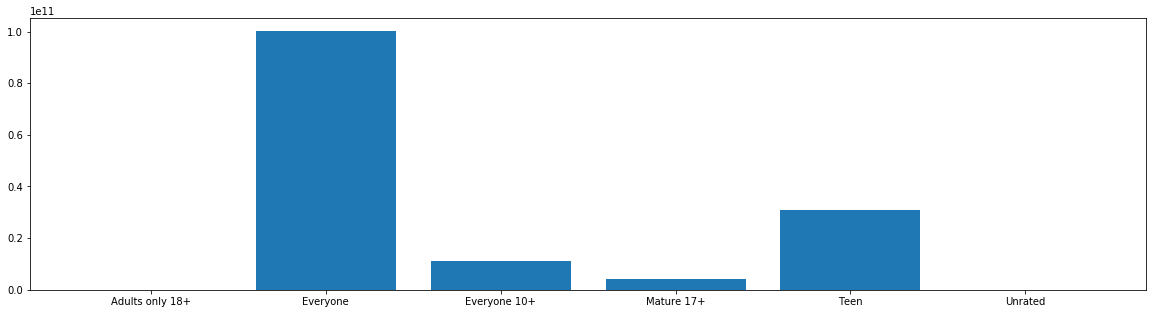

In [49]:
#Content Rating
x= df.groupby('Content Rating')['Installs'].sum()
plt.subplots(figsize=(20,5))
plt.bar(x.index,x)

Next we explore how each attribute affects the rating of an application.

<BarContainer object of 10357 artists>

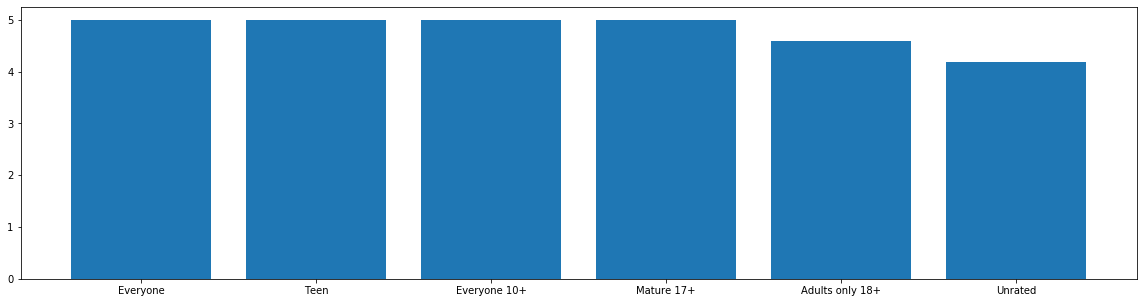

In [52]:
#Content Rating 
plt.subplots(figsize=(20,5))
plt.bar(df['Content Rating'],df.Rating)

In [53]:
#Genre: Here we used the mean instead of the sum.
df.groupby('Genres')['Rating'].mean().sort_values(ascending=False)

Genres
Comics;Creativity                        4.800000
Board;Pretend Play                       4.800000
Health & Fitness;Education               4.700000
Strategy;Action & Adventure              4.600000
Puzzle;Education                         4.600000
Adventure;Brain Games                    4.600000
Entertainment;Creativity                 4.533333
Music;Music & Video                      4.533333
Strategy;Education                       4.500000
Racing;Pretend Play                      4.500000
Tools;Education                          4.500000
Arcade;Pretend Play                      4.500000
Casual;Brain Games                       4.469231
Simulation;Action & Adventure            4.430000
Adventure;Action & Adventure             4.423077
Strategy;Creativity                      4.400000
Card;Brain Games                         4.400000
Entertainment;Education                  4.400000
Puzzle;Creativity                        4.400000
Role Playing;Action & Adventure          4.

<BarContainer object of 10357 artists>

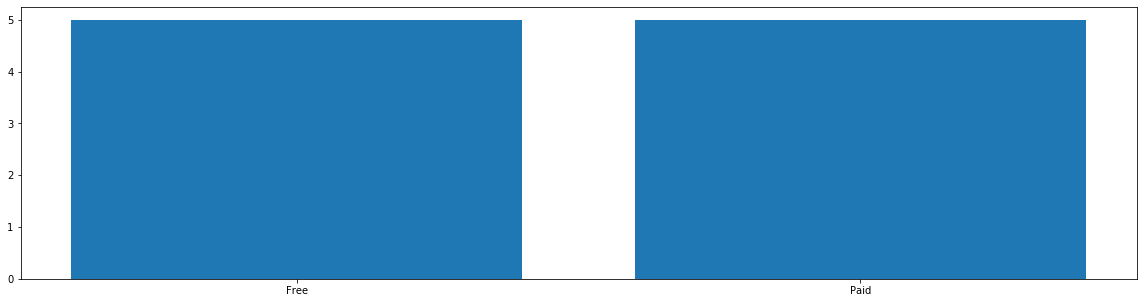

In [55]:
#Type
plt.subplots(figsize=(20,5))
plt.bar(df['Type'],df.Rating)

<BarContainer object of 10357 artists>

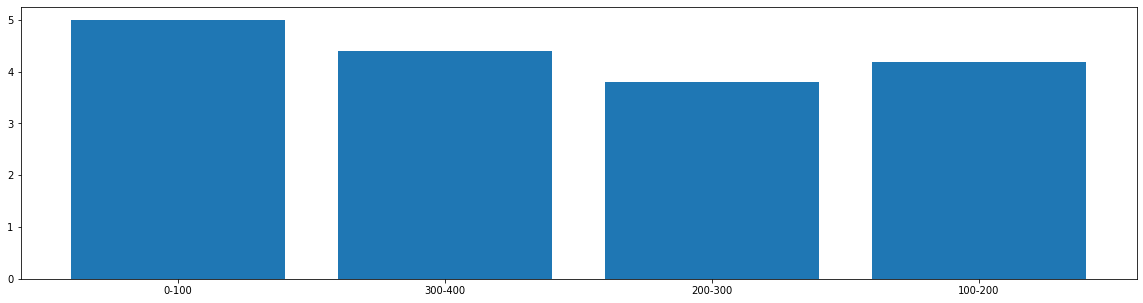

In [56]:
#Price
plt.subplots(figsize=(20,5))
plt.bar(df.Price_labels,df.Rating)

<BarContainer object of 10357 artists>

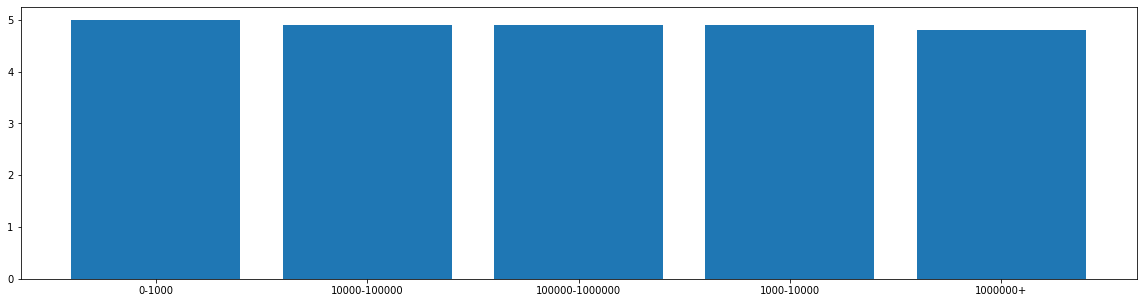

In [57]:
#Reviews
plt.subplots(figsize=(20,5))
plt.bar(df.Reviews_labels,df.Rating)

In [58]:
#Installs
cut_labels = ['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000+']
cut_bins = [-1,1000,10000,100000,1000000,1000000000]
df['Installs_labels'] = pd.cut(df['Installs'], bins=cut_bins, labels=cut_labels)

<BarContainer object of 10357 artists>

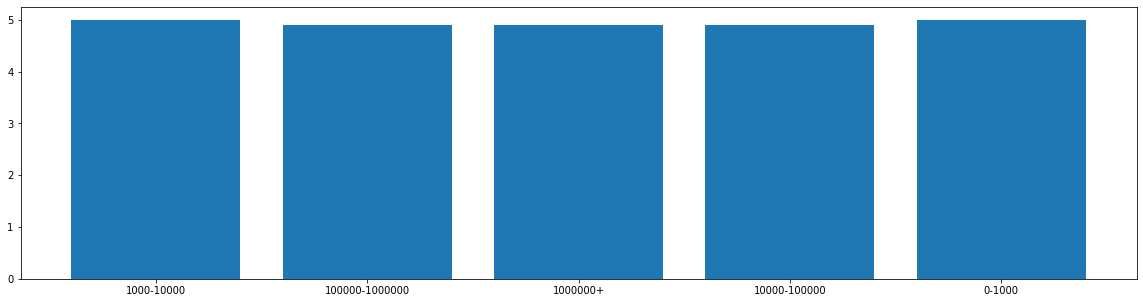

In [59]:
plt.subplots(figsize=(20,5))
plt.bar(df.Installs_labels,df.Rating)

Regression Model for Installs: 

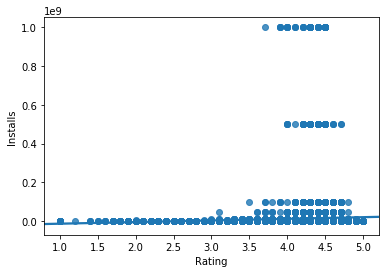

In [60]:
#Rating
import seaborn as sns

sns.regplot(x="Rating", y="Installs", data=df)

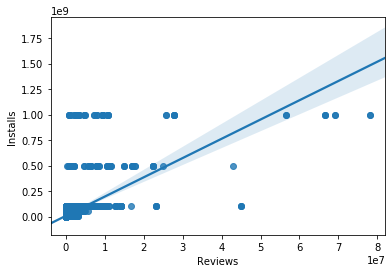

In [61]:
#Reviews
sns.regplot(x="Reviews", y="Installs", data=df)

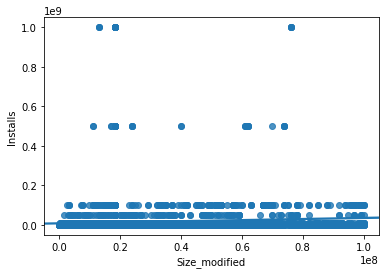

In [62]:
#Size
sns.regplot(x="Size_modified", y="Installs", data=df)

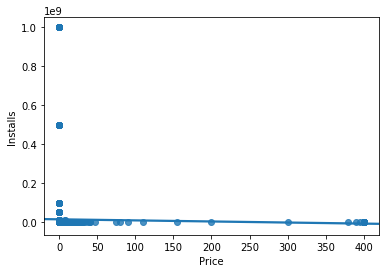

In [63]:
#Price
sns.regplot(x="Price", y="Installs", data=df)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Rating"]]
y_data = df['Installs']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Rating']], y_train)
lre.score(x_test[['Rating']], y_test)

number of test samples : 3108
number of training samples: 7249


0.0024027845114430457

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Reviews"]]
y_data = df['Installs']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Reviews']], y_train)
lre.score(x_test[['Reviews']], y_test)

number of test samples : 3108
number of training samples: 7249


0.4442133464980597

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Size_modified"]]
y_data = df['Installs']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Size_modified']], y_train)
lre.score(x_test[['Size_modified']], y_test)

number of test samples : 3108
number of training samples: 7249


0.005136795685048767

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Price"]]
y_data = df['Installs']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Price']], y_train)
lre.score(x_test[['Price']], y_test)

number of test samples : 3108
number of training samples: 7249


-0.0010486704603300812

Regression Model for Rating: 

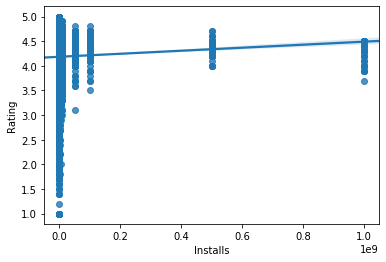

In [71]:
#Installs
import seaborn as sns

sns.regplot(x="Installs", y="Rating", data=df)


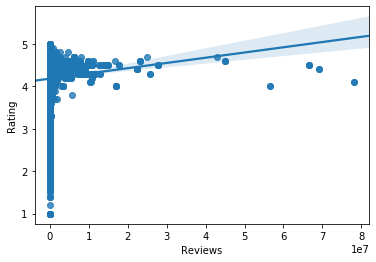

In [72]:
#Reviews
sns.regplot(x="Reviews", y="Rating", data=df)

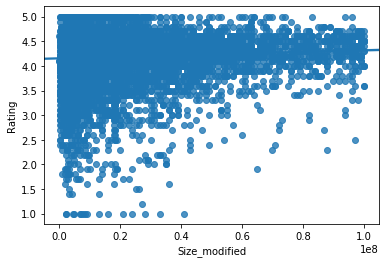

In [73]:
#Size
sns.regplot(x="Size_modified", y="Rating", data=df)

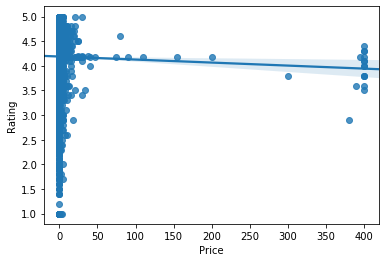

In [74]:
#Price
sns.regplot(x="Price", y="Rating", data=df)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Installs"]]
y_data = df['Rating']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Installs']], y_train)
lre.score(x_test[['Installs']], y_test)

number of test samples : 3108
number of training samples: 7249


0.0033612988485561823

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Reviews"]]
y_data = df['Rating']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Reviews']], y_train)
lre.score(x_test[['Reviews']], y_test)

number of test samples : 3108
number of training samples: 7249


0.0053539069708631315

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Size_modified"]]
y_data = df['Rating']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Size_modified']], y_train)
lre.score(x_test[['Size_modified']], y_test)

number of test samples : 3108
number of training samples: 7249


0.0059192103828101805

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[["Price"]]
y_data = df['Rating']



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['Price']], y_train)
lre.score(x_test[['Price']], y_test)

number of test samples : 3108
number of training samples: 7249


0.00021934513134447278

3-Final Analysis

For an application's number of installs, the bar charts and the statistical methods showed the following patterns:
1-Applications with higher rating are installed more.
2-Applications with larger number of reviews are installed more.
3-Applications with lower price are installed more.
4-Free applications are installed more than paid applications.
5-"Communication" applications are the most installed, while "role playing/education" applications are the least installed.
6-Applications whose content rating is "Everyone" are the most installed, while those whose rating is "Adults only 18+" or "Unrated" are the least installed. 

For an application's number of installs, the regression model showed the following patterns:
1-Rating, Reviews and Size all have a positive correlation with the number of Installs, with the number of Reviews being the most effective attribute.
2-Price has a negative correlation with the number of installs. 

For an application's rating, the bar charts and the statistical methods showed the following patterns:
1-Applications with content rating "Everyone", "10+", "Teen" and "Mature 17+" have similar ratings, which are higher than applications whose rating is "Adults only 18+" and finally "Unrated" applications have the lowest ratings. 
2-"Comics/Creativity" applications have the highest ratings, while "Brain Games/Parenting" applications have the lowest ratings.
3-"Free" and "Paid" applications have similar ratings.
4-Number of Reviews and Number of Installs don't have a remarkable impact on an application's rating.
5-Applications with price range "0-100" dollars have higher ratings compared to applications of other price ranges, but with no pattern detected among the different price ranges. 

For an application's rating, the regression model showed the following patterns:
None of the "price", "size", "number of reviews" and "number of installs" has a remarkable impact on the "rating", with all of them showing positive correlation. 

4-Strengths and Short-comings: 

-Strengths: Most of the provided attributes were used in the analysis process, therefore clear patterns were detected. 
-Short-Comings: The average value for an application's size and rating was used for applications whose size or rating was not provided. However, given more time to collect the data, those values could have been obtained for more accurate results. 

**The second dataset containing reviews and sentiment analysis of applications was not included in the scope of this analysis, however some data cleaning techniques were applied on it for later use. 

In [80]:
#Importing the dataset 
df2 = pd.read_csv("E:/Semester9/DE/googleplaystore_user_reviews.csv") 

In [81]:
#Dropping duplicates
df2.drop_duplicates(subset=None, keep='first', inplace=True)


In [82]:
#Dropping entries where the sentiment is not available
df2 = df2.dropna(axis=0, subset=['Sentiment'])

In [84]:
#Checking for null values
df2.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [85]:
#Making a copy of the dataframe 
df3 = df2

In [86]:
#Assigning the average value of the sentiment polarity to each application
df3['Sentiment_Polarity'] = df3.groupby('App')['Sentiment_Polarity'].transform('mean')

In [87]:
#Assigning the average value of the sentiment subjectivity to each application
df3['Sentiment_Subjectivity'] = df3.groupby('App')['Sentiment_Subjectivity'].transform('mean')

In [88]:
#Deciding the sentiment of each application based on its average sentiment polarity
df3.loc[df3.Sentiment_Polarity < 0, 'S' ] = 'Negative'

In [89]:
df3.loc[df3.Sentiment_Polarity > 0, 'S' ] = 'Positive'

In [90]:
df3.loc[df3.Sentiment_Polarity == 0, 'S' ] = 'Neutral'

In [92]:
#Replacing the old sentiment with the new sentiment
df3.drop(columns=['Sentiment'], inplace=True)

In [94]:
df3.rename(columns={'S':'Sentiment'}, inplace=True)

In [95]:
#Exporting the dataset 
df3.to_csv ("E:/Semester9/DE/reviews_modified.csv", index = None, header=True)